> Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution

>Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one

>Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse

>In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training)

# The Curse of Dimensionality

It turns out that many things behave very differently in high-dimensional space

For example, if you pick a random point in a unit square (a 1 × 1 square), it will have only about a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension)

But in a 10,000-dimensional unit hypercube (a 1 × 1 × × 1 cube, with ten thousand 1s), this . probability is greater than 99.999999%. Most points in a high-dimensional hypercube are very close to the border

Here is a more troublesome difference: if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? Well, the average distance, believe it or not, will be about 408.25 (roughly $\sqrt {1,000,000/6}$

This fact implies that high dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other. Of course, this also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations

**In short, the more dimensions the training set has, the greater the risk of overfitting it**

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances. Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions

With just 100 features (much less than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions


# Main Approaches for Dimensionality Reduction

let’s take a look at the two main approaches to reducing dimensionality: projection and Manifold Learning

##Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST)．　As a result, all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space

In Figure 8-2 you can see a 3D data set represented by the circles


<p align='center'>
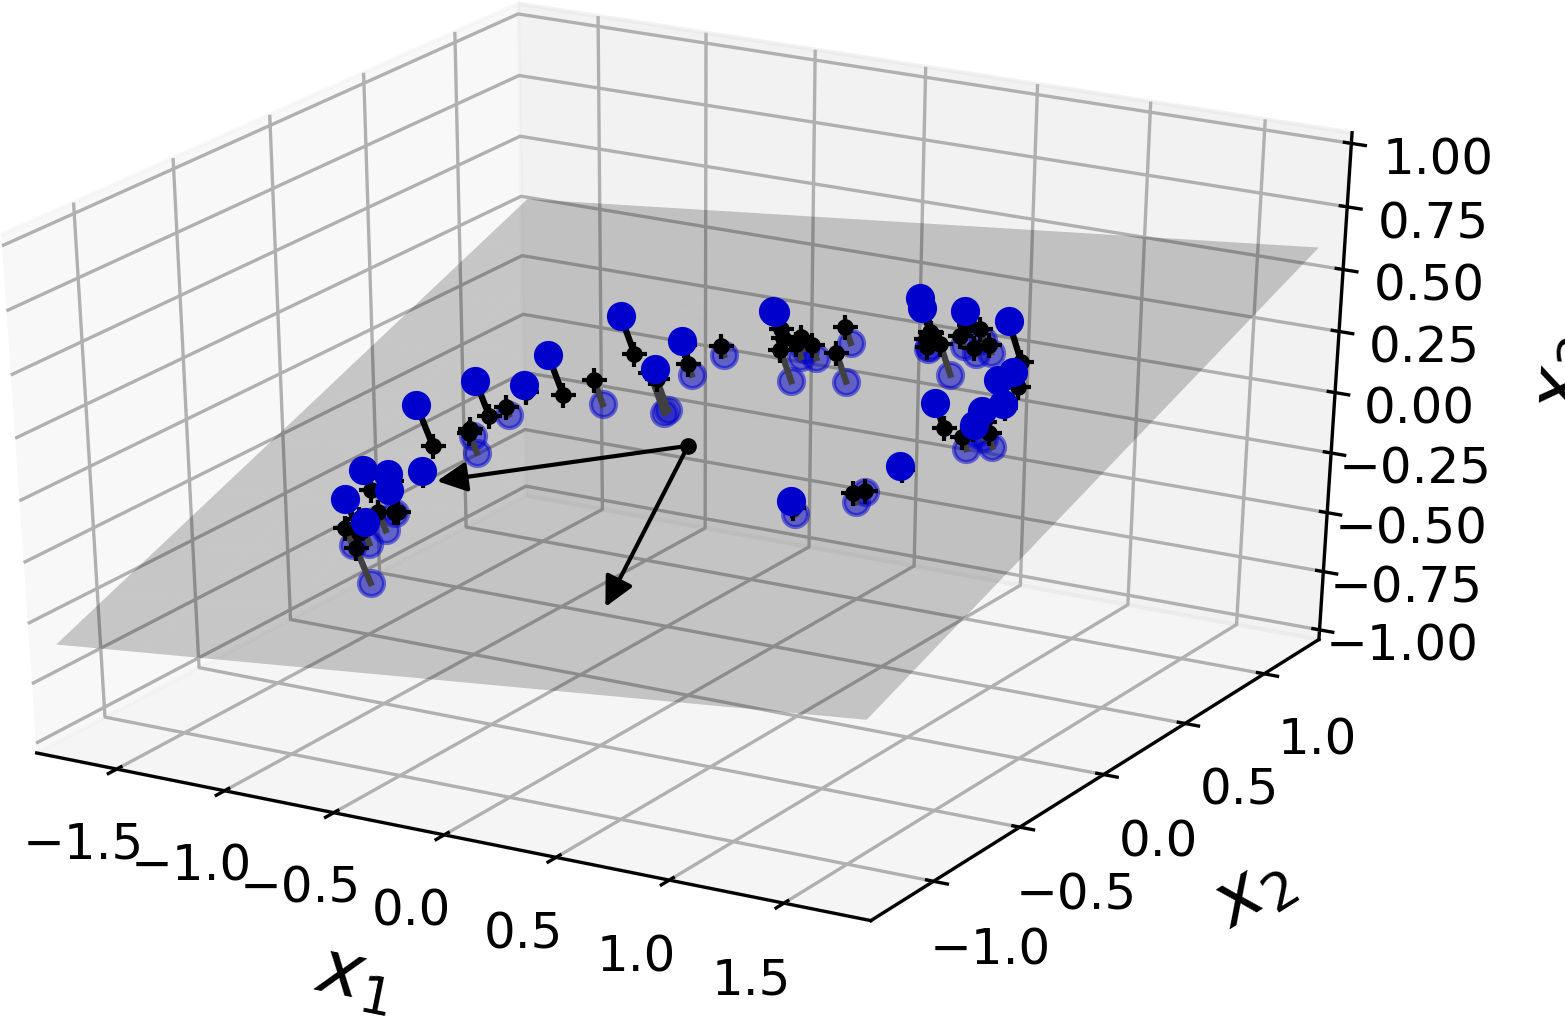
</p>
Figure 8-2. A 3D dataset lying close to a 2D subspace

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space

Now if we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3

Ta-da! We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on the plane)



<p align='center'>
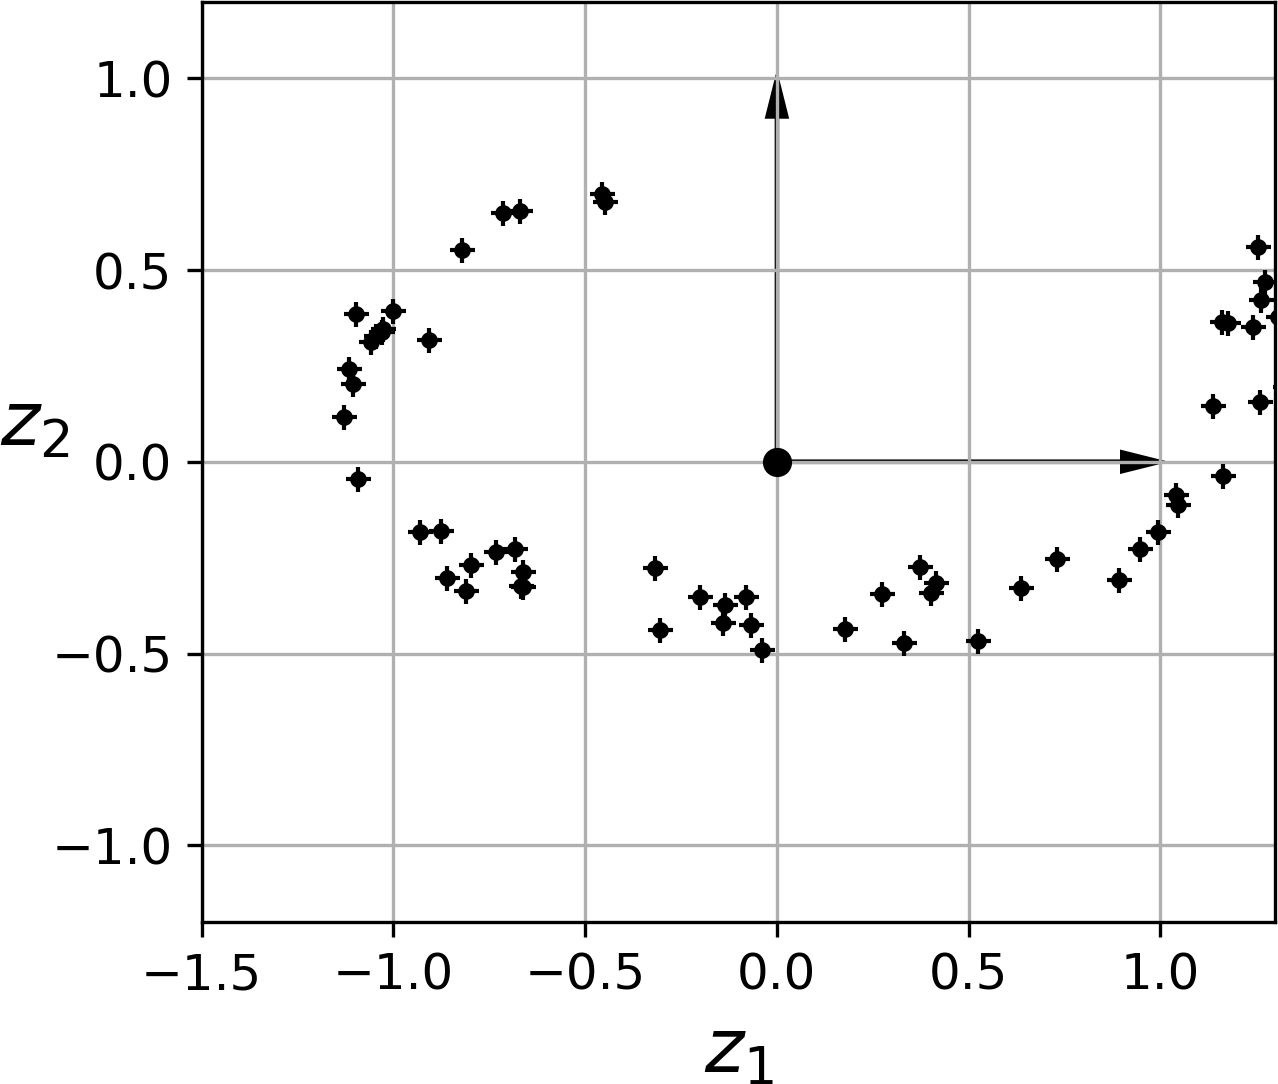
</p>
Figure 8-3. The new 2D dataset after projection

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset represented in Figure 8-4

<p align='center'>
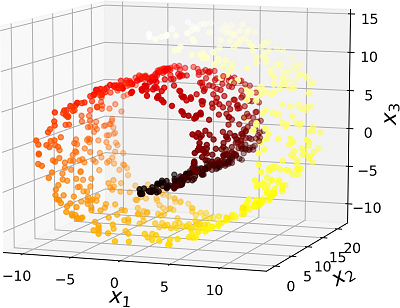
</p>

Figure 8-4. Swiss roll dataset

Simply projecting onto a plane (e.g., by dropping $x_3$) would squash different layers of the Swiss roll together, as shown on the left of Figure 8-5. 

However, what you really want is to unroll the Swiss roll to obtain the 2D dataset on the right of Figure 8-5

<p align='center'>
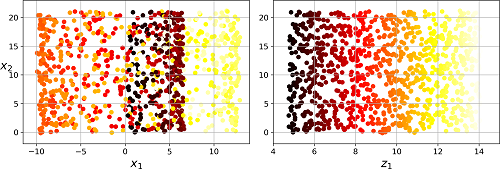
</p>
Figure 8-5. Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right)

## Manifold Learning

The Swiss roll is an example of a 2D manifold. Put simply, **a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space**

More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed



